#**Aula 1 - Tratando os Dados**

In [ ]:
import pandas as pd

In [ ]:
cadastrados = pd.read_csv('https://github.com/alura-tech/alura-tech-pos-data-science-credit-scoring-streamlit/blob/main/dados/clientes_cadastrados.csv?raw=True')

In [ ]:
cadastrados.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [ ]:
cadastrados.shape

(438557, 18)

In [ ]:
cadastrados['ID_Cliente'].value_counts()

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [ ]:
cadastrados.duplicated().sum()

0

In [ ]:
cadastrados['ID_Cliente'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
438552    False
438553    False
438554    False
438555    False
438556    False
Name: ID_Cliente, Length: 438557, dtype: bool

In [ ]:
cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [ ]:
id_repetidos = cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']

In [ ]:
df_cadastrados_limpo = cadastrados.drop(id_repetidos.index)

In [ ]:
df_cadastrados_limpo.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [ ]:
df_cadastrados_limpo['ID_Cliente'].value_counts()

5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [ ]:
df_cadastrados_limpo.isnull().sum()

ID_Cliente                    0
Genero                        0
Tem_carro                     0
Tem_casa_propria              0
Qtd_filhos                    0
Rendimento_anual              0
Categoria_de_renda            0
Grau_escolaridade             0
Estado_civil                  0
Moradia                       0
Idade                         0
Anos_empregado                0
Tem_celular                   0
Tem_telefone_trabalho         0
Tem_telefone_fixo             0
Tem_email                     0
Ocupacao                 134177
Tamanho_familia               0
dtype: int64

In [ ]:
df_cadastrados_limpo['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [ ]:
df_cadastrados_limpo['Ocupacao'].fillna(value='Outro', inplace=True)

In [ ]:
df_cadastrados_limpo.nunique()

ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

In [ ]:
df_cadastrados_limpo.drop('Genero', axis=1, inplace=True)

In [ ]:
df_cadastrados_limpo.drop('Tem_celular', axis=1, inplace=True)

In [ ]:
df_cadastrados_limpo['Tem_carro'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df_cadastrados_limpo['Tem_casa_propria'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df_cadastrados_limpo['Tem_telefone_trabalho'].unique()

array([1, 0])

In [ ]:
df_cadastrados_limpo['Tem_telefone_fixo'].unique()

array([0, 1])

In [ ]:
df_cadastrados_limpo['Tem_email'].unique()

array([0, 1])

In [ ]:
df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace(['Y','N'],[1,0])
df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace(['Y','N'],[1,0])

In [ ]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,0,1,1,Vendas,1.0


In [ ]:
# Tratamento da feature Idade
df_cadastrados_limpo['Idade']=-df_cadastrados_limpo['Idade']/365.2425

In [ ]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

 365243    75314
-218         262
-1678        251
-249         241
-978         240
           ...  
-13529         1
-10223         1
-8917          1
-11429         1
-8105          1
Name: Anos_empregado, Length: 9406, dtype: int64

In [ ]:
# Tratamento da feature anos empregado
df_cadastrados_limpo['Anos_empregado']=-df_cadastrados_limpo['Anos_empregado']/365.2425

In [ ]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

-1000.001369    75314
 0.596864         262
 4.594208         251
 0.681739         241
 2.677673         240
                ...  
 37.041144          1
 27.989623          1
 24.413917          1
 31.291539          1
 22.190736          1
Name: Anos_empregado, Length: 9406, dtype: int64

In [ ]:
df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado']<0,'Anos_empregado']=0

In [ ]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

0.000000     75314
0.596864       262
4.594208       251
0.681739       241
2.677673       240
             ...  
37.041144        1
27.989623        1
24.413917        1
31.291539        1
22.190736        1
Name: Anos_empregado, Length: 9406, dtype: int64

In [ ]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868574,12.435574,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793815,3.104787,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321403,8.353354,0,1,1,Vendas,1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

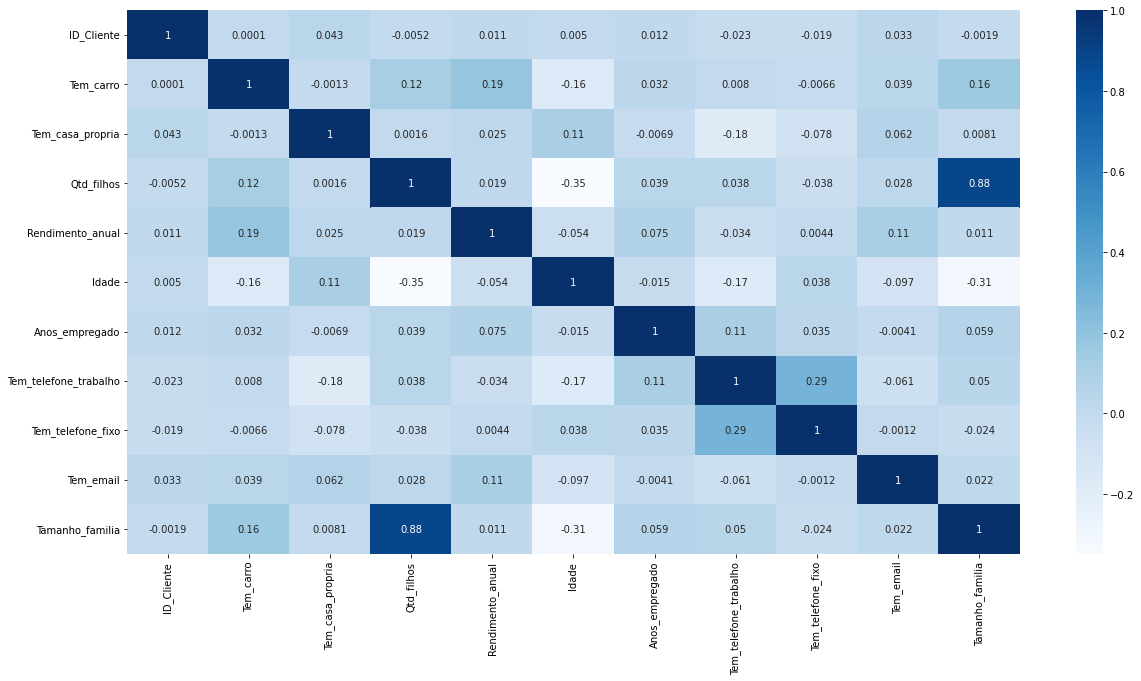

In [ ]:
corr = df_cadastrados_limpo.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
df_cadastrados_limpo.drop(['Qtd_filhos'], axis=1, inplace=True)

In [ ]:
df_cadastrados_limpo=df_cadastrados_limpo[['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 
                                           'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                                           'Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado',
                                           'Categoria_de_renda', 'Grau_escolaridade', 'Estado_civil',
                                           'Moradia', 'Ocupacao']]

In [ ]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,32.868574,12.435574,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,58.793815,3.104787,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,52.321403,8.353354,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [ ]:
colunas_quantitativas = ['Tamanho_familia', 'Rendimento_anual', 'Idade', 'Anos_empregado']

In [ ]:
df_cadastrados_limpo[colunas_quantitativas].describe()

,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,2.194461,1.875220e+05,43.800857,5.948371
std,0.897194,1.100832e+05,11.458262,6.564112
min,1.000000,2.610000e+04,20.504186,0.000000
25%,2.000000,1.215000e+05,34.262168,1.015763
50%,2.000000,1.611000e+05,42.793487,4.019247
75%,3.000000,2.250000e+05,53.345380,8.495725
max,20.000000,6.750000e+06,68.997994,47.998248


In [ ]:
df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize = True) * 100

Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: Categoria_de_renda, dtype: float64

In [ ]:
df_cadastrados_limpo['Grau_escolaridade'].value_counts(normalize = True) * 100

Ensino médio                  68.821314
Ensino superior               26.797928
Ensino superior incompleto     3.385690
Ensino fundamental             0.923909
Pós-graduação                  0.071158
Name: Grau_escolaridade, dtype: float64

In [ ]:
df_cadastrados_limpo['Estado_civil'].value_counts(normalize = True) * 100

Casado           68.367912
Solteiro         12.601976
União-estável     8.329323
Divorciado        6.214663
Viúvo             4.486125
Name: Estado_civil, dtype: float64

In [ ]:
df_cadastrados_limpo['Moradia'].value_counts(normalize = True) * 100

Casa/apartamento próprio    89.801876
Mora com os pais             4.349740
Habitação pública            3.241094
Apartamento alugado          1.362259
Apartamento comercial        0.894032
Cooperativa habitacional     0.350999
Name: Moradia, dtype: float64

In [ ]:
df_cadastrados_limpo['Ocupacao'].value_counts(normalize = True) * 100

Outro                   30.601670
Construção Civil        17.840730
Equipe principal         9.805388
Vendas                   9.371828
Gerência                 8.091219
Motorista                5.949191
Alta tecnologia          3.941724
Contabilidade            3.644549
Medicina                 3.083042
Cozinha                  1.841432
Segurança                1.822959
Limpeza                  1.332610
Serviço privado          0.787980
Baixa qualificação       0.488069
Secretariado             0.466174
Garçom                   0.379736
Corretor imobiliário     0.237420
RH                       0.176526
TI                       0.137754
Name: Ocupacao, dtype: float64

In [ ]:
import matplotlib as mpl

In [ ]:
#Configurações dos gráficos:
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)

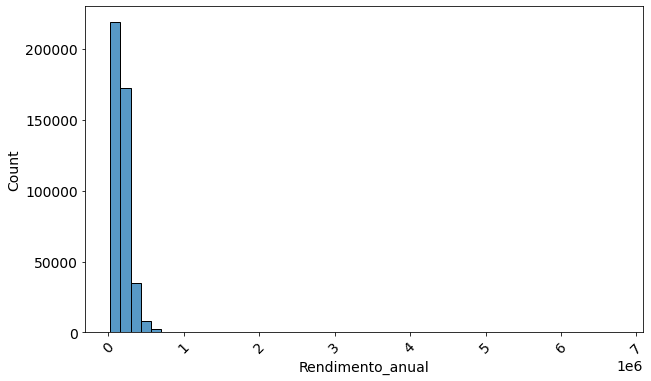

In [ ]:
sns.histplot(data=df_cadastrados_limpo, x='Rendimento_anual', bins=50) 
plt.xticks(rotation=45)
plt.show()

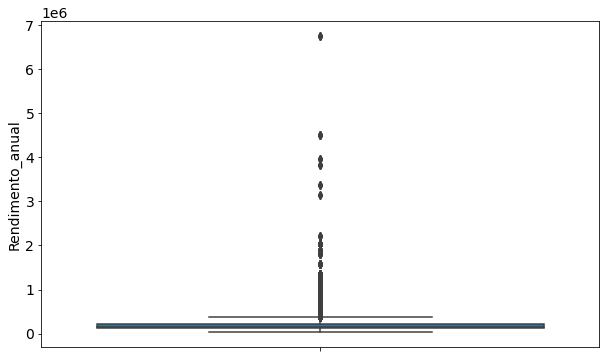

In [ ]:
sns.boxplot(data=df_cadastrados_limpo, y='Rendimento_anual') 
plt.xticks(rotation=45)
plt.show()

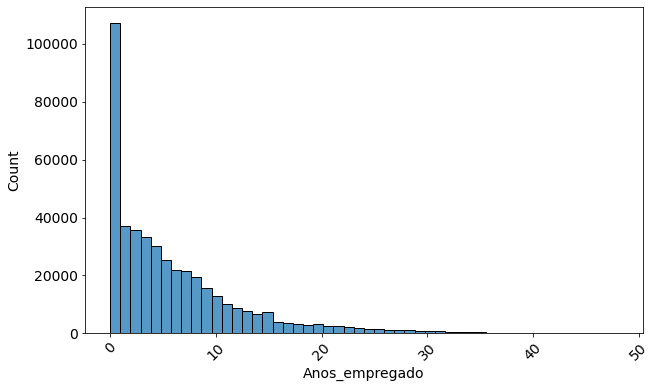

In [ ]:
sns.histplot(data=df_cadastrados_limpo, x='Anos_empregado', bins=50) 
plt.xticks(rotation=45)
plt.show()

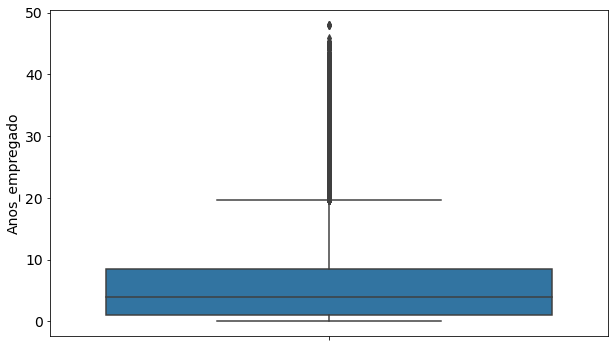

In [ ]:
sns.boxplot(data=df_cadastrados_limpo, y='Anos_empregado') 
plt.xticks(rotation=45)
plt.show()

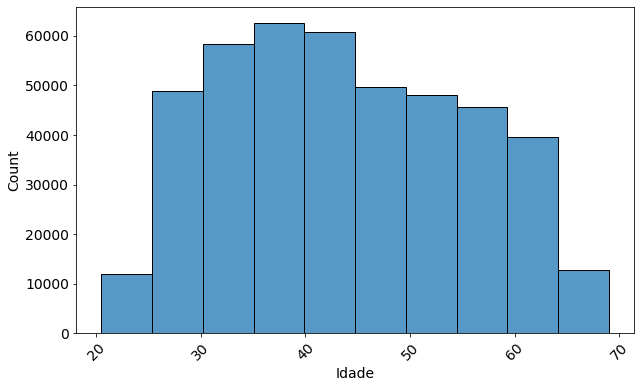

In [ ]:
sns.histplot(data=df_cadastrados_limpo, x='Idade', bins=10) 
plt.xticks(rotation=45)
plt.show()

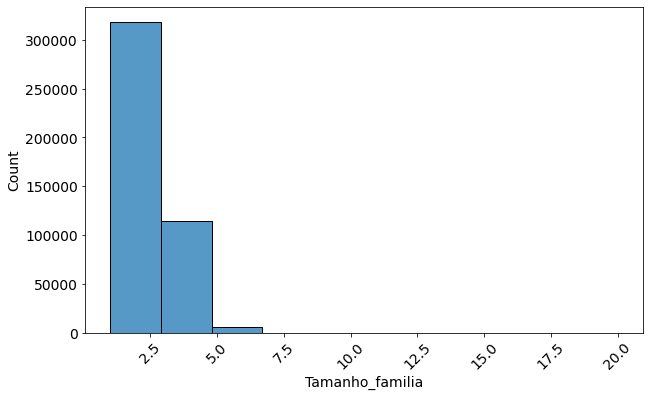

In [ ]:
sns.histplot(data=df_cadastrados_limpo, x='Tamanho_familia', bins=10) 
plt.xticks(rotation=45)
plt.show()

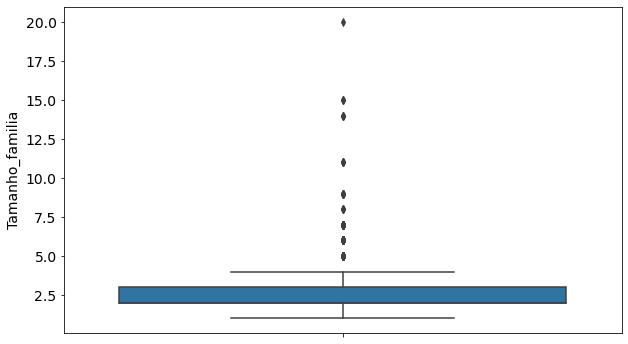

In [ ]:
sns.boxplot(data=df_cadastrados_limpo, y='Tamanho_familia') 
plt.xticks(rotation=45)
plt.show()

In [ ]:
'''Técnica para remoção de outliers a partir de um intervalo de confiança
o valor +- o desvio-padrão'''

coluna = df_cadastrados_limpo['Rendimento_anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items(): 
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(index)

len(index_outliers)

12641

In [ ]:
df_clientes_cadastrados_sem_outliers = df_cadastrados_limpo.drop(index_outliers)
df_clientes_cadastrados_sem_outliers.shape

(425822, 15)

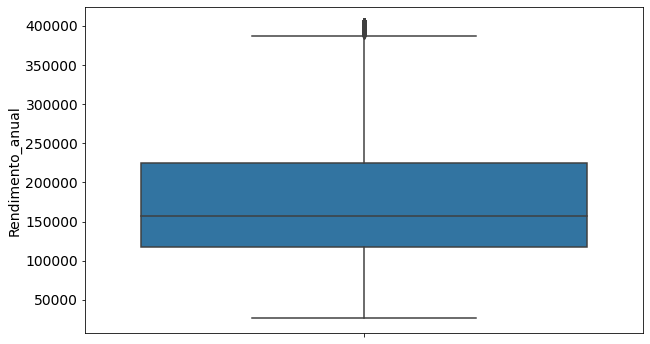

In [ ]:
sns.boxplot(data=df_clientes_cadastrados_sem_outliers, y='Rendimento_anual') 
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_clientes_cadastrados_sem_outliers['Rendimento_anual'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 2         112500.0
3         270000.0
4         270000.0
5         270000.0
6         270000.0
            ...   
438552    135000.0
438553    103500.0
438554     54000.0
438555     72000.0
438556    121500.0
Name: Rendimento_anual, Length: 425822, dtype: float64>

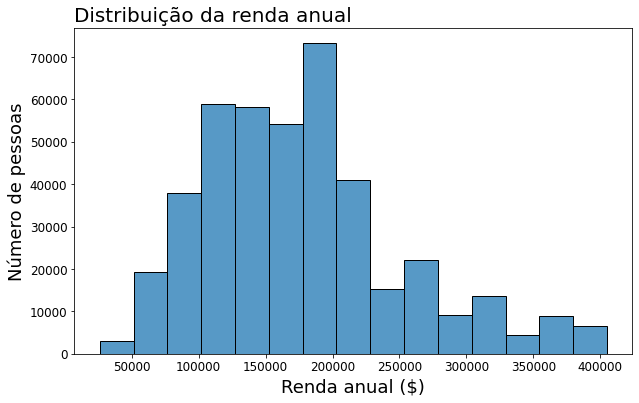

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Rendimento_anual', bins=15)
plt.xticks(rotation=360)
ax.set_title('Distribuição da renda anual', fontsize = 20, loc='left')
ax.set_ylabel('Número de pessoas', fontsize = 18)
ax.set_xlabel('Renda anual ($)', fontsize = 18)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
plt.show()

In [ ]:
df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers
df_clientes_cadastrados_tratamento1.shape

(425822, 15)